In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/mount/work"
[1] "/mount/work/out/proj_combeffect"


In [2]:
FDIRY  = "marginal_filter95"
CHROMS = paste0("chr", c(1:22, "X", "Y")) 

In [3]:
chroms  = CHROMS
lst_tmp = lapply(chroms, function(chrom){

    ### get motifs
    fdiry = file.path(FD_RES, "model_linear", FDIRY, chrom)
    fname = "lm*"
    fglob = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    motifs = sapply(fpaths, function(fpath) {str_remove_all(fpath, pattern = ".*lm_|\\.RDS") })
    print(head(motifs, 2))
})

 /mount/work/out/proj_combeffect/model_linear/marginal_filter95/chr1/lm_AIRE.RDS 
                                                                          "AIRE" 
/mount/work/out/proj_combeffect/model_linear/marginal_filter95/chr1/lm_AP1_1.RDS 
                                                                         "AP1_1" 
 /mount/work/out/proj_combeffect/model_linear/marginal_filter95/chr2/lm_AIRE.RDS 
                                                                          "AIRE" 
/mount/work/out/proj_combeffect/model_linear/marginal_filter95/chr2/lm_AP1_1.RDS 
                                                                         "AP1_1" 
 /mount/work/out/proj_combeffect/model_linear/marginal_filter95/chr3/lm_AIRE.RDS 
                                                                          "AIRE" 
/mount/work/out/proj_combeffect/model_linear/marginal_filter95/chr3/lm_AP1_1.RDS 
                                                                         "AP1_1" 
 /mount/work/out

In [4]:
chroms  = CHROMS
lst_dat = lapply(chroms, function(chrom){

    ### get motifs
    fdiry = file.path(FD_RES, "model_linear", FDIRY, chrom)
    fname = "lm*"
    fglob = file.path(fdiry, fname)
    fpaths = Sys.glob(fglob)
    motifs = sapply(fpaths, function(fpath) {str_remove_all(fpath, pattern = ".*lm_|\\.RDS") })

    ### import motif results
    lst_mtf = lapply(fpaths, function(fpath){
        lst = readRDS(fpath)
        return(lst)
    })
    names(lst_mtf) = motifs
    
    return(lst_mtf)
})

names(lst_dat) = chroms

In [5]:
lst_res_dmso = lapply(lst_dat, function(lst_mtf){
    ###
    lst_cof = lapply(names(lst_mtf), function(mtf){
        
        ###
        dat = lst_mtf[[mtf]][["input20x"]]
        fit = dat$fit_log
        res = as.data.frame(summary(fit)$coefficients)
        
        ###
        b   = res['XXTFX_DMSO', c("Estimate", "Pr(>|t|)")]
        b   = c(mtf, b)
        names(b) = c("Motif", "Estimate", "Pvalue")
        return(b)
    })

    ###
    dat = bind_rows(lst_cof)
    dat = dat %>% na.omit
    dat = dat %>% 
        mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
        mutate(NLogP = -log10(AdjPvalue)) 
    dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
    return(dat)
})

In [6]:
lst_res_dex = lapply(lst_dat, function(lst_mtf){
    ###
    lst_cof = lapply(names(lst_mtf), function(mtf){
        
        ###
        dat = lst_mtf[[mtf]][["input20x"]]
        fit = dat$fit_log
        res = as.data.frame(summary(fit)$coefficients)
        
        ###
        b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
        b   = c(mtf, b)
        names(b) = c("Motif", "Estimate", "Pvalue")
        return(b)
    })

    ###
    dat = bind_rows(lst_cof)
    dat = dat %>% na.omit
    dat = dat %>% 
        mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
        mutate(NLogP = -log10(AdjPvalue)) 
    dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
    return(dat)
})

In [7]:
dat = lst_res_dmso[[1]]
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,-0.3373951,4.818476e-06,7.153811e-06,5.145463,gray50
AP1_1,0.7816025,2.412963e-12,6.488188e-11,10.187877,gray50
AP1_2,0.3651889,3.157164e-11,2.634599e-10,9.579285,gray50
BATF,0.1828164,1.578005e-06,2.580252e-06,5.588338,gray50
BCL6_1,-0.2956843,1.060405e-02,1.188047e-02,1.925167,gray50
BCL6_2,0.1623050,4.035365e-09,1.075997e-08,7.968189,gray50


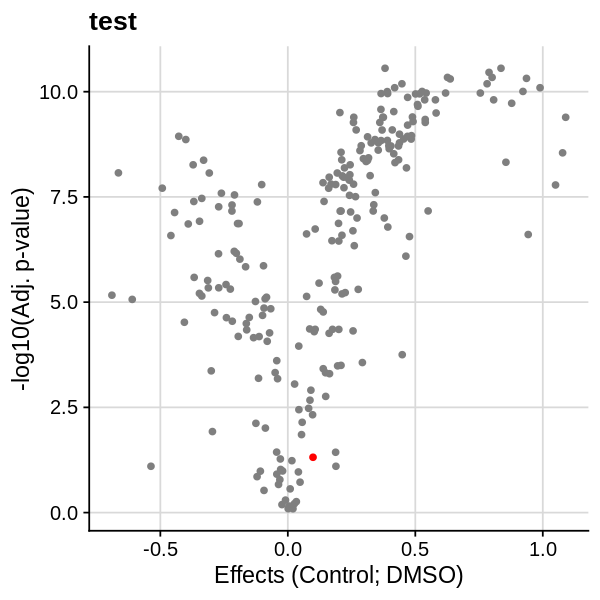

In [8]:
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title="test") +
        theme_cowplot() + 
        background_grid()
gpt = gpt + labs(x="Effects (Control; DMSO)")

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

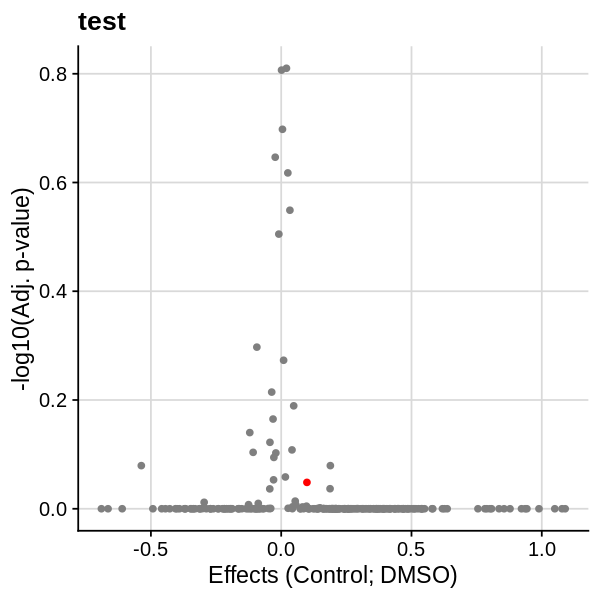

In [9]:
gpt = ggplot(dat, aes(x=Estimate, y=AdjPvalue)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title="test") +
        theme_cowplot() + 
        background_grid()
gpt = gpt + labs(x="Effects (Control; DMSO)")

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [11]:
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:vroom’:

    col_factor


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [13]:
fun = trans_format("log10", math_format(10^.x))
fun(0.01)

expression(10^-2)

In [27]:
scientific_10 <- function(x) {
    parse(text=gsub("e", " %*% 10^", scales::scientific_format()(x)))
}
scientific_10(0.01)

expression(1 %*% 10^-2)

In [ ]:
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title="test") +
        theme_cowplot() + 
        background_grid() +
        scale_y_continuous(
            breaks=c(0,2,4,6,8,10), 
            labels=c("0", expression(10^-2), "0.0001", "10^-6", "10^-8", "10^-10"))
gpt = gpt + labs(x="Effects (Control; DMSO)")

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [15]:
library(scales)
reverselog_trans <- function(base = exp(1)) {
    trans <- function(x) -log(x, base)
    inv <- function(x) base^(-x)
    trans_new(paste0("reverselog-", format(base)), trans, inv, 
              log_breaks(base = base), 
              domain = c(1e-100, Inf))
}

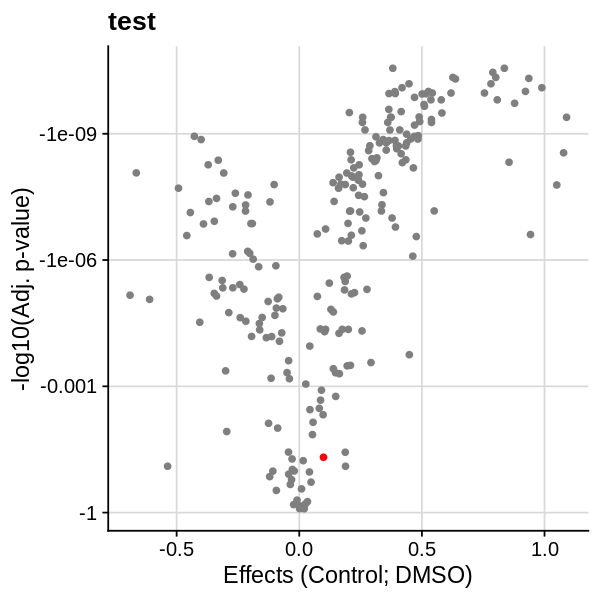

In [17]:
gpt = ggplot(dat, aes(x=Estimate, y=AdjPvalue)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title="test") +
        theme_cowplot() + 
        background_grid()
gpt = gpt + labs(x="Effects (Control; DMSO)")

gpt = gpt + scale_y_continuous(
    trans  = reverselog_trans(base=10),
    labels = trans_format("identity", function(x) -x))
                          
options(repr.plot.height=5, repr.plot.width=5)
print(gpt)             

-----

In [6]:
lst_gpt_dmso = lapply(names(lst_res_dmso), function(chrom){
    dat = lst_res_dmso[[chrom]]
    gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title=chrom) +
        theme_cowplot() + 
        background_grid()
    return(gpt)
})
names(lst_gpt_dmso) = names(lst_res_dmso)

In [7]:
lst_gpt_dex = lapply(names(lst_res_dex), function(chrom){
    dat = lst_res_dex[[chrom]]
    gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title=chrom) +
        theme_cowplot() + 
        background_grid()
    return(gpt)
})
names(lst_gpt_dex) = names(lst_res_dex)

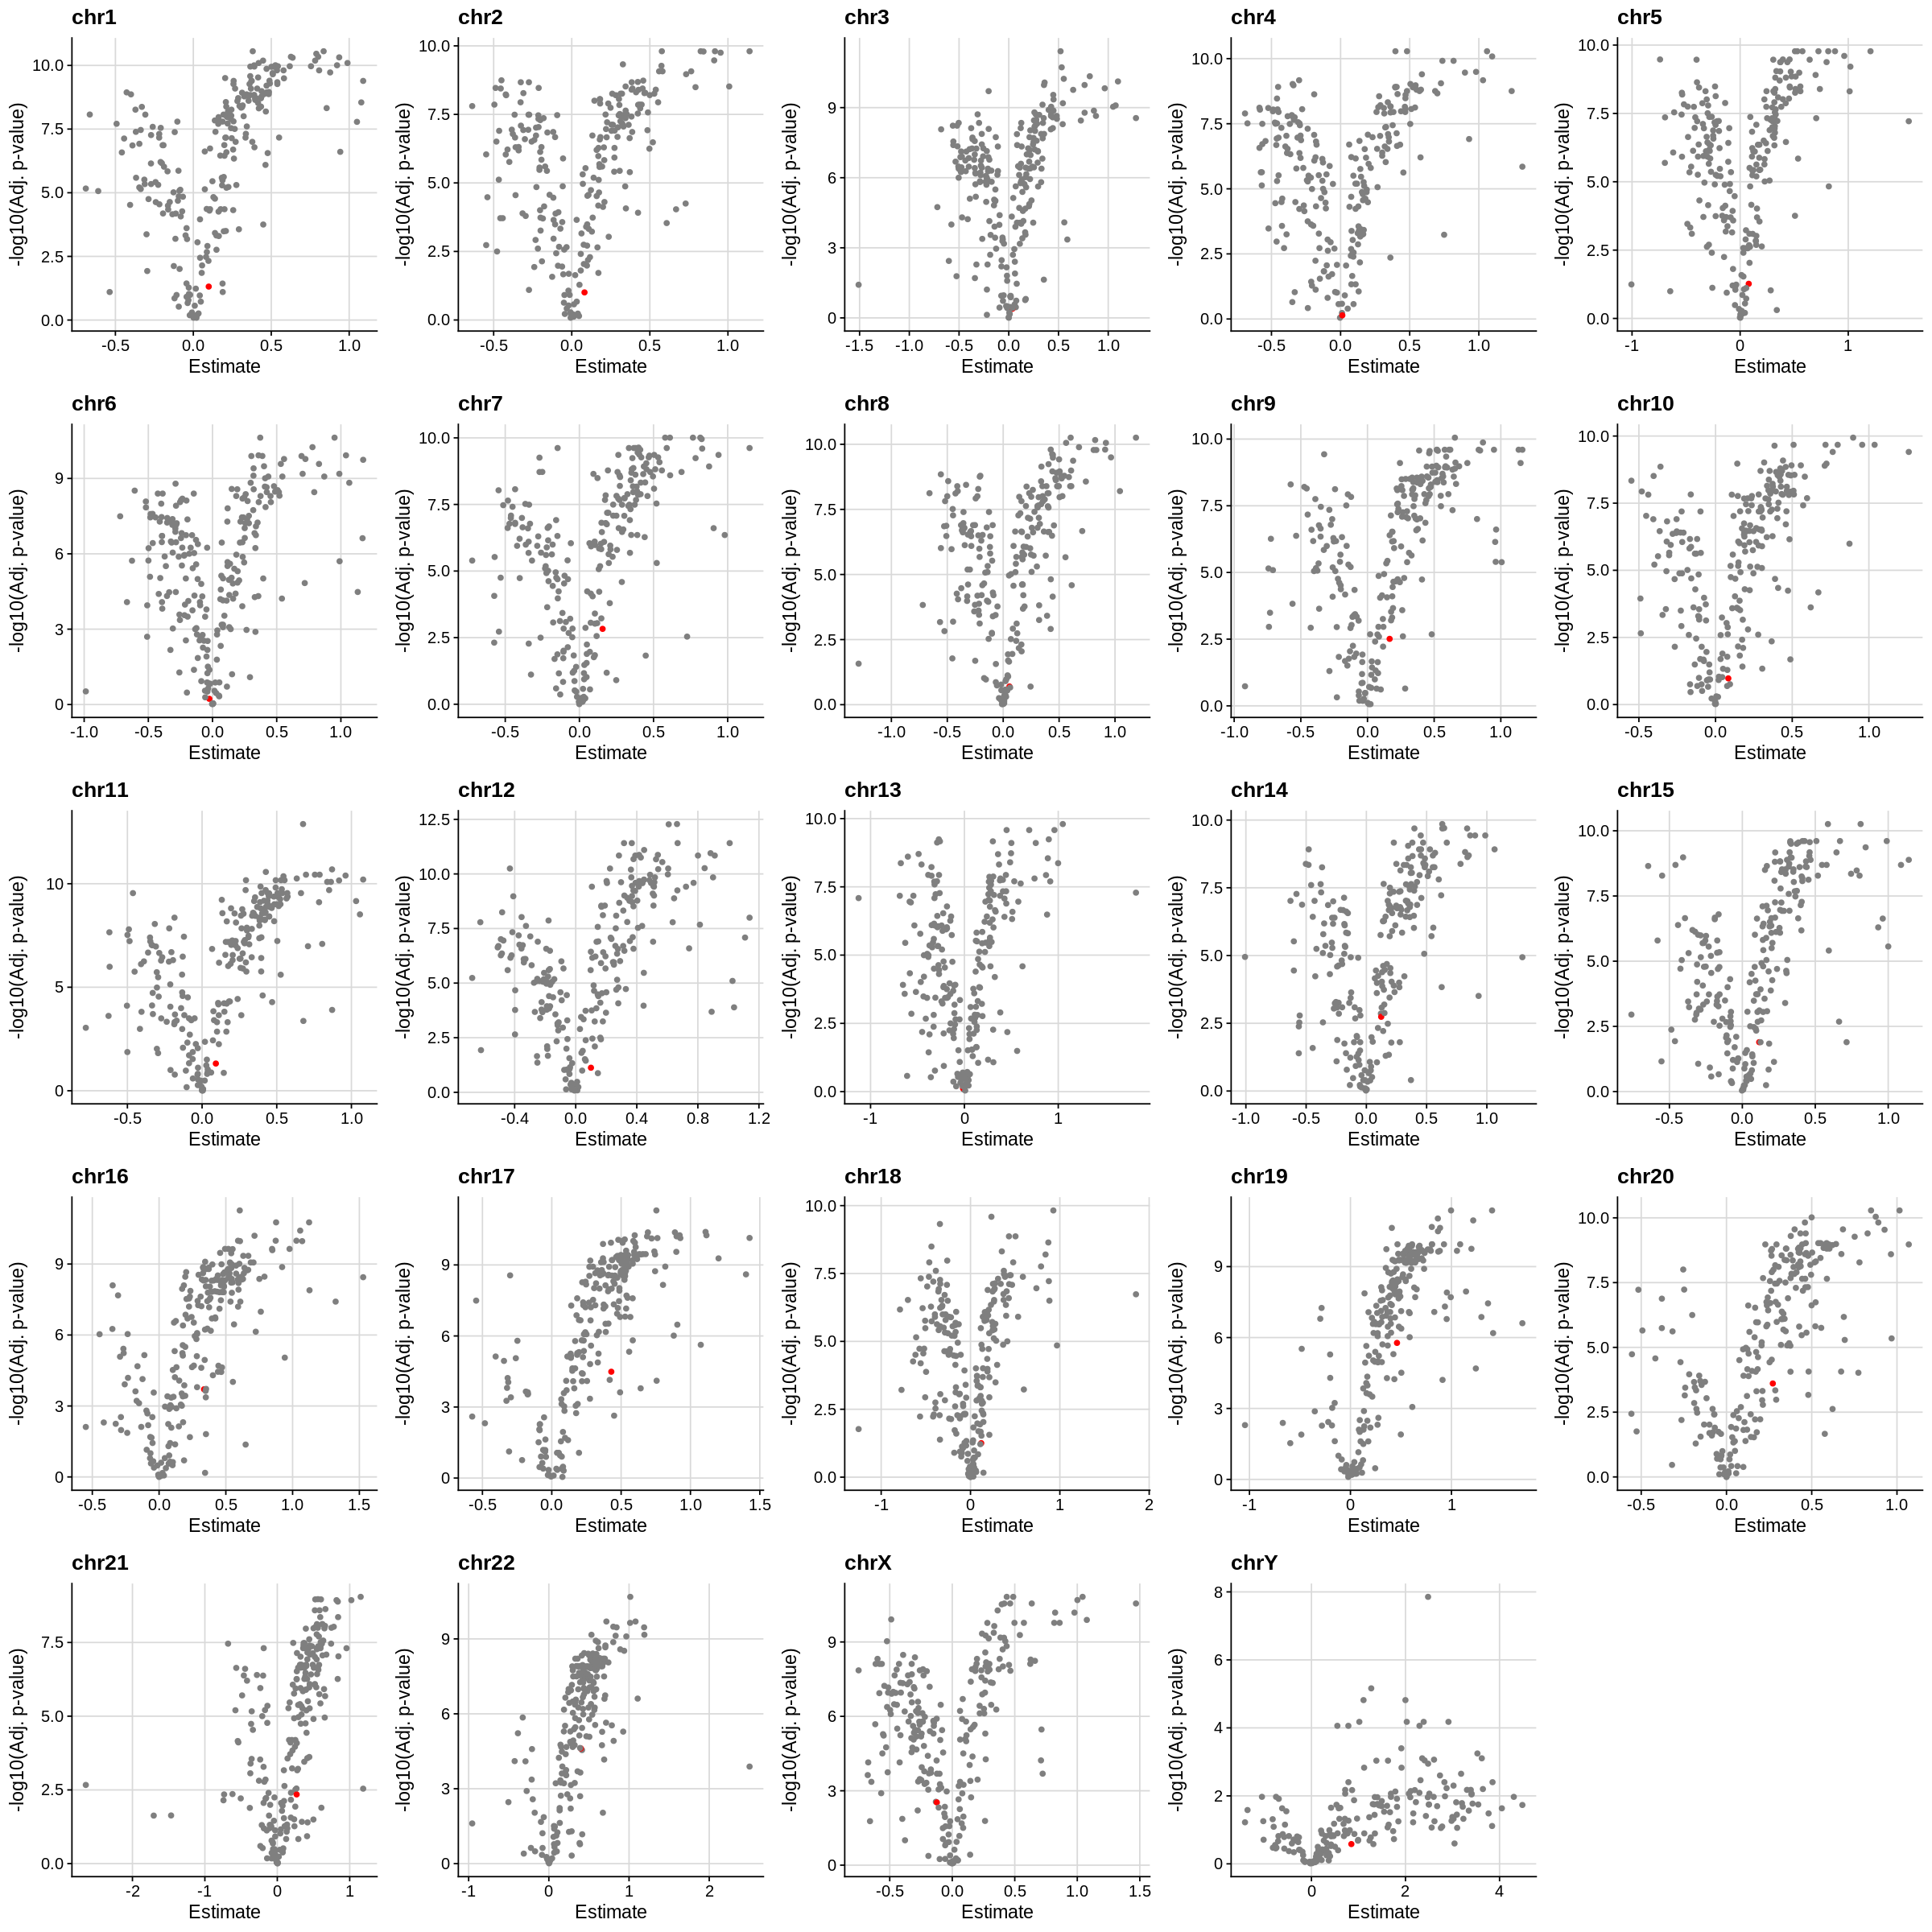

In [8]:
options(repr.plot.height=20, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_dmso, align = "v")

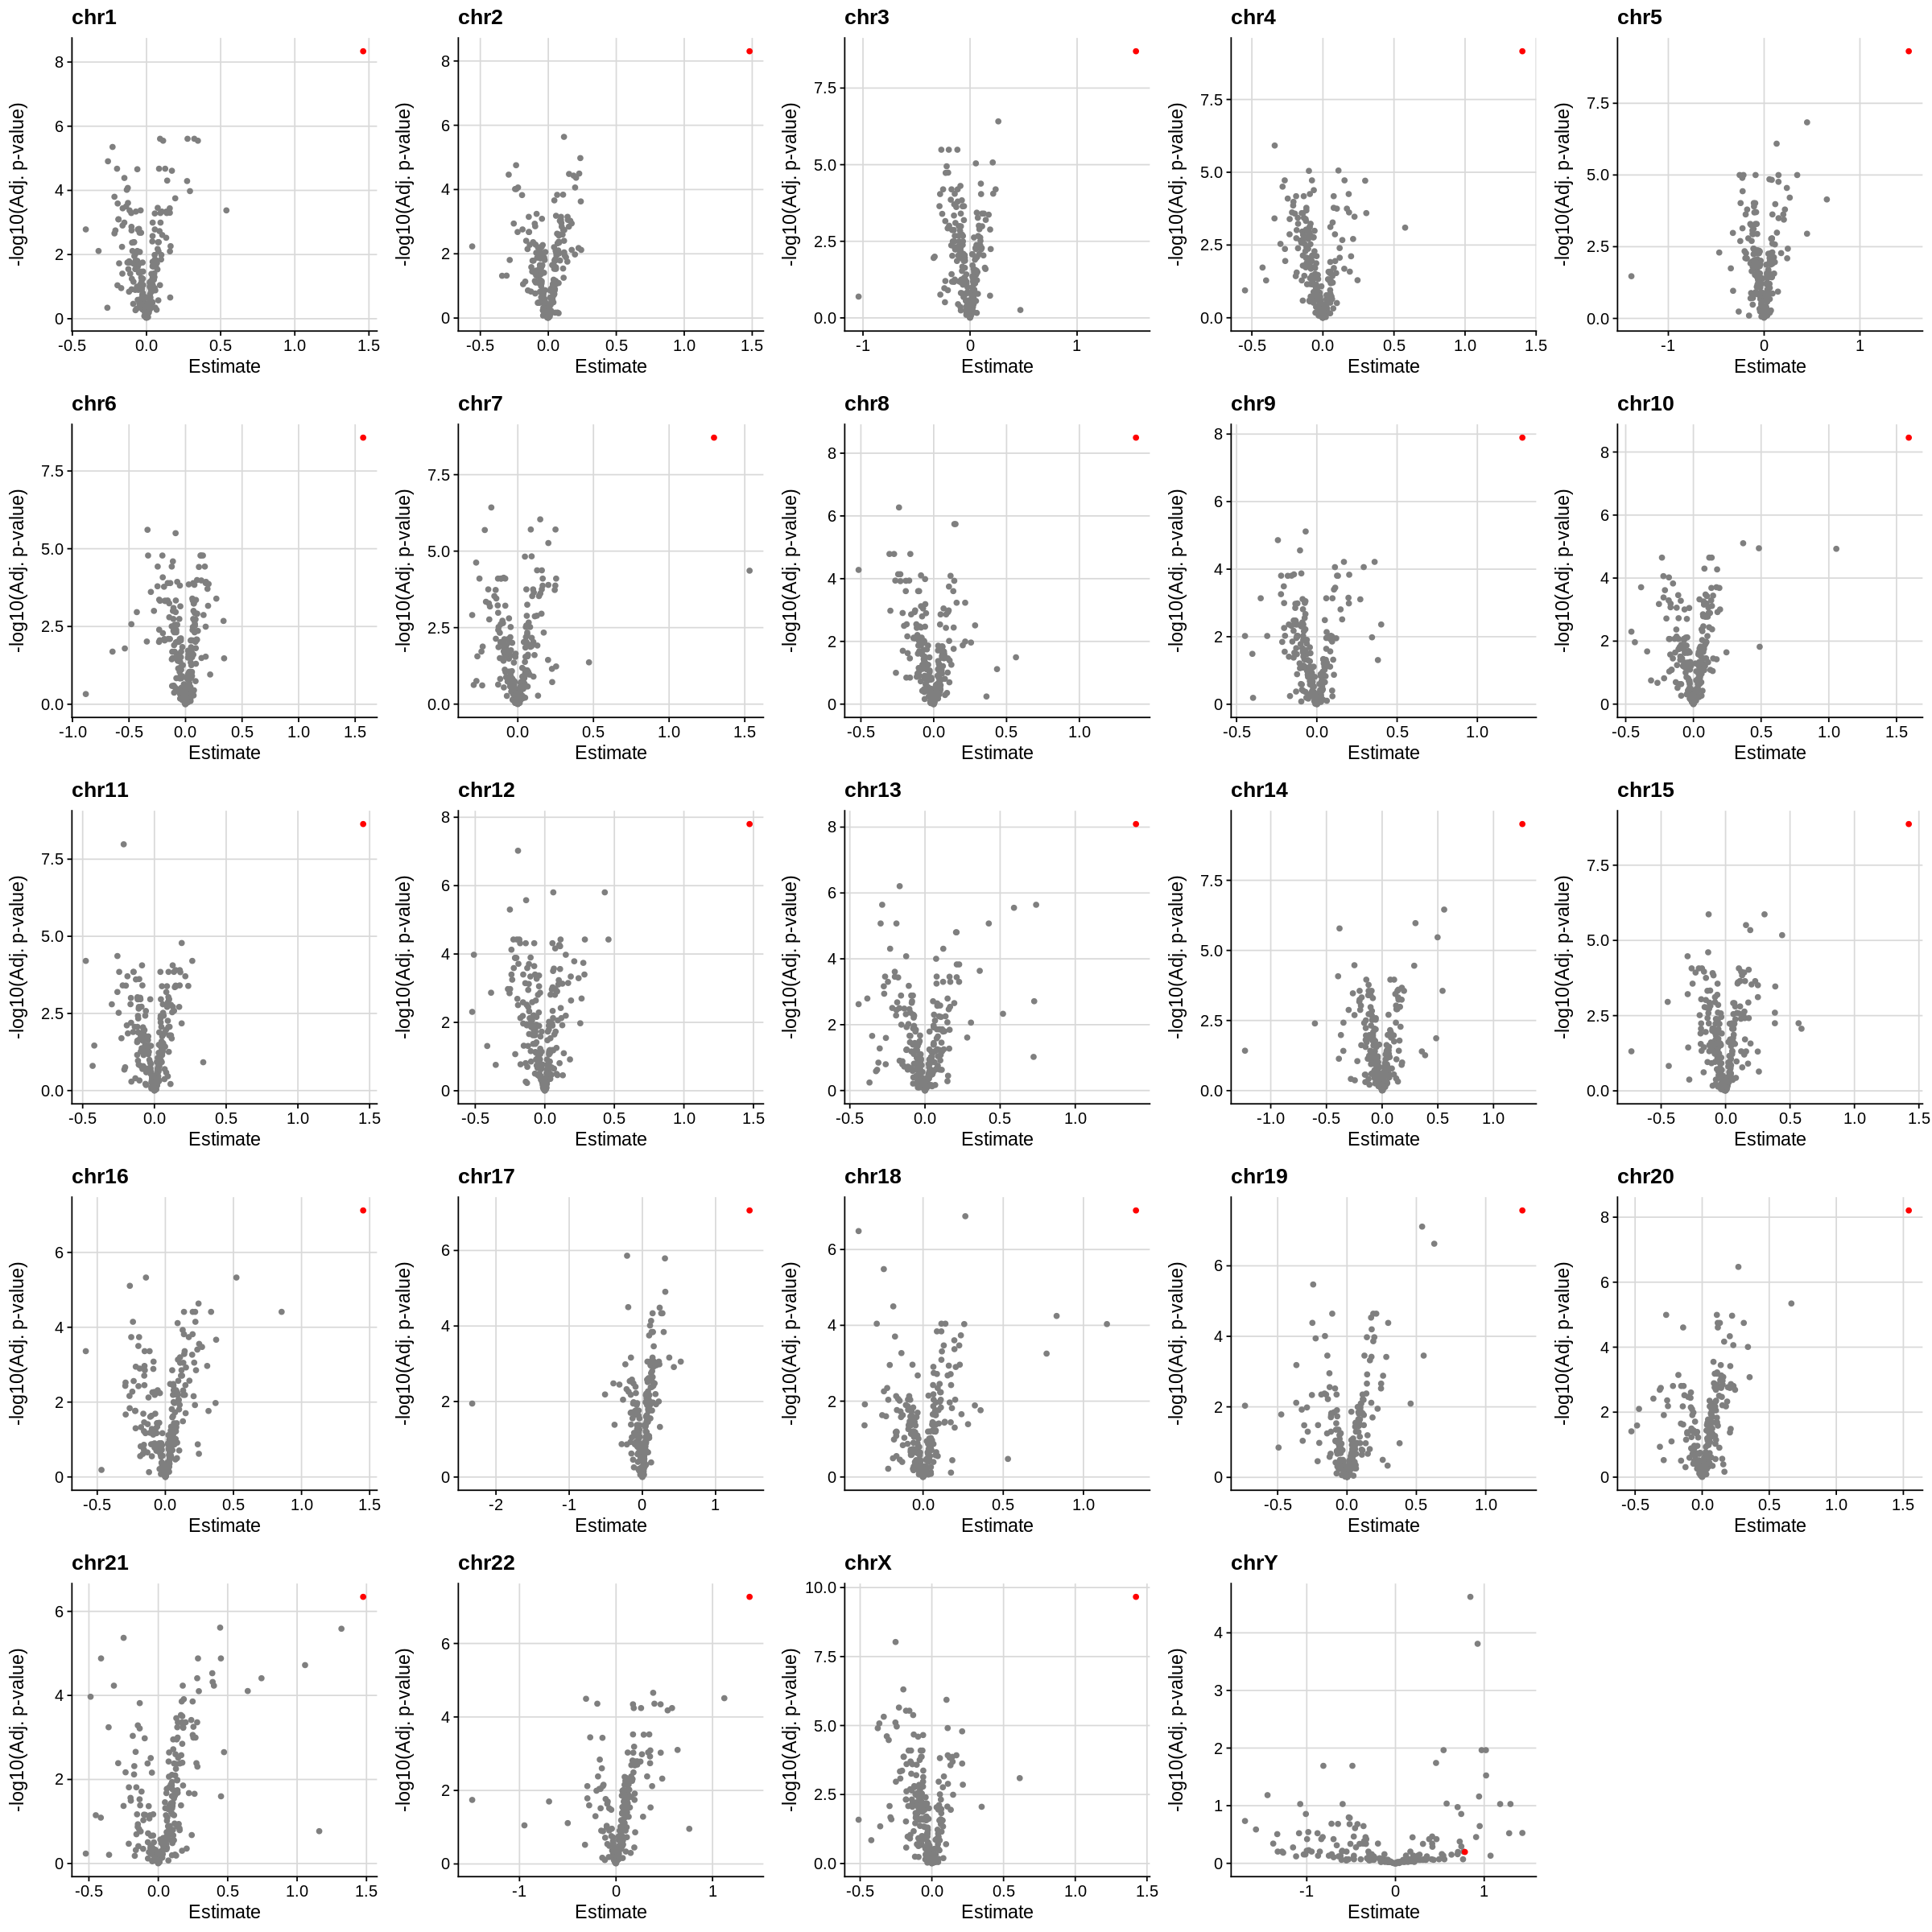

In [9]:
options(repr.plot.height=20, repr.plot.width=20)
plot_grid(plotlist = lst_gpt_dex, align = "v")

## Dig into the results

In [11]:
dat = lst_res_dmso[["chr17"]] %>% arrange(-NLogP)
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NFY,0.7541807,2.070803e-14,5.011343e-12,11.30005,gray50
CREB_ATF_1,1.1088162,3.345675e-13,4.048266e-11,10.39273,gray50
EGR,0.8880177,6.589230e-13,4.221031e-11,10.37458,gray50
YY1,0.6929841,6.976911e-13,4.221031e-11,10.37458,gray50
CREB_ATF_2,0.5980001,1.361008e-12,5.601181e-11,10.25172,gray50
E2F_4,0.9219075,1.620176e-12,5.601181e-11,10.25172,gray50


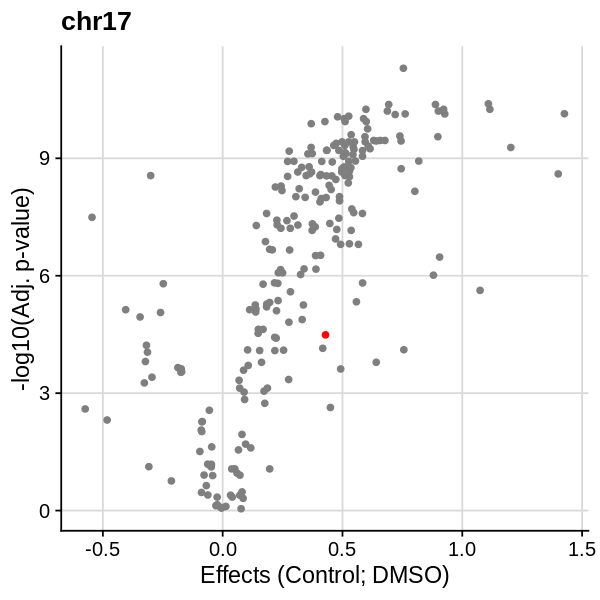

In [15]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = lst_gpt_dmso[["chr17"]]
gpt = gpt + labs(x="Effects (Control; DMSO)")
print(gpt)

In [13]:
dat = lst_res_dex[["chr17"]] %>% arrange(-NLogP)
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NR_20,1.4641565,3.596697e-10,8.704007e-08,7.060281,red
NFY,-0.2088885,1.138796e-08,1.377944e-06,5.860769,gray50
ZBTB49,0.3085176,2.008049e-08,1.619826e-06,5.790532,gray50
HD_1,0.3130961,2.050964e-07,1.240833e-05,4.906287,gray50
SOX_4,-0.1934275,6.539706e-07,3.165218e-05,4.499596,gray50
HD_20,0.2362277,8.117107e-07,3.273900e-05,4.484935,gray50


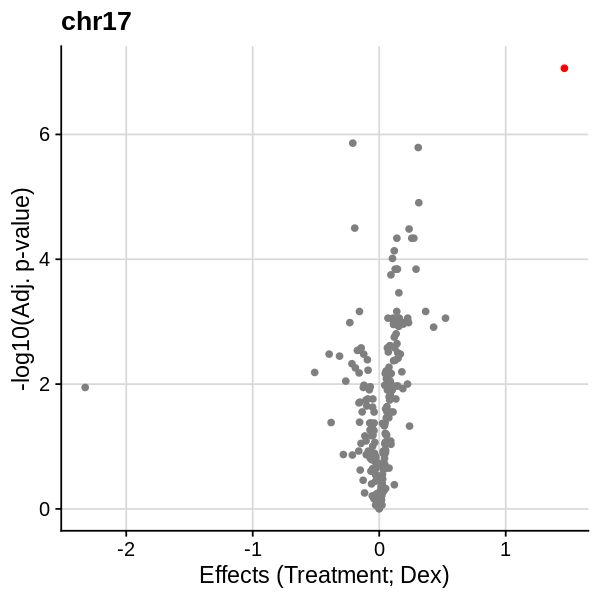

In [16]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = lst_gpt_dex[["chr17"]]
gpt = gpt + labs(x="Effects (Treatment; Dex)")
print(gpt)

In [69]:
dat = lapply(names(lst_res_dex), function(chrom){
    res = lst_res_dex[[chrom]] %>% 
        mutate(Chrom = chrom) %>%
        arrange(-NLogP) %>% 
        head(20)
    return(res)
})
dat = bind_rows(dat)
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color,Chrom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NR_20,1.46111148,1.905245e-11,4.610693e-09,8.336234,red,chr1
HD_20,0.32229870,4.075964e-08,2.465958e-06,5.608014,gray50,chr1
SPDEF_1,0.27674187,3.454784e-08,2.465958e-06,5.608014,gray50,chr1
ZNF24,0.09157333,3.216386e-08,2.465958e-06,5.608014,gray50,chr1
HD_10,0.34666596,6.856575e-08,2.833430e-06,5.547687,gray50,chr1
SOX_1,0.11207343,7.025034e-08,2.833430e-06,5.547687,gray50,chr1


In [71]:
tmp = dat %>% group_by(Motif) %>% summarize(Score = mean(Estimate), Count = n()) %>% arrange(-Count)
print(dim(tmp))
head(tmp, 20)

[1] 157   3


Motif,Score,Count
<chr>,<dbl>,<int>
NR_20,1.42938005,23
NFY,-0.23289251,21
ZBTB14,-0.24408416,14
ZNF329,-0.36209996,13
CREB_ATF_2,0.22928350,12
HSF,0.21479266,12
ZNF418,-0.17852254,12
FOX_7,0.13459262,11
NRF1,-0.22784512,10


In [19]:
dat_dmso = lst_res_dmso[["chr17"]]
dat_dex  = lst_res_dex[["chr17"]]

In [20]:
head(dat_dmso)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,-0.30802067,6.807769e-02,7.557248e-02,1.1216363,gray50
AP1_1,0.90007860,2.311053e-12,6.214164e-11,10.2066173,gray50
AP1_2,0.54780608,1.076789e-10,5.922341e-10,9.2275066,gray50
BATF,0.21779427,6.042296e-05,8.168915e-05,4.0878356,gray50
BCL6_1,-0.06186959,3.812747e-01,3.994306e-01,0.3985587,gray50
BCL6_2,0.30540959,3.926660e-09,9.561127e-09,8.0194909,gray50


In [21]:
head(dat_dex)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,-0.11548526,4.836786e-01,0.5547404179,0.2559102,gray50
AP1_1,0.15076563,8.374618e-05,0.0008782653,3.0563743,gray50
AP1_2,-0.01426324,5.181752e-01,0.5859738356,0.2321218,gray50
BATF,-0.06647222,8.487365e-02,0.1291787694,0.8888089,gray50
BCL6_1,-0.04213442,5.671616e-01,0.6267264836,0.2029220,gray50
BCL6_2,0.14355207,7.799278e-06,0.0001440763,3.8414075,gray50


In [49]:
dat_dex %>% arrange(Estimate) %>% head

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HSFY2,-2.3245399,0.0039745283,0.011315716,1.9463180,gray50
HD_24,-0.5101347,0.0018273253,0.006503128,2.1868777,gray50
REL-halfsite,-0.3957857,0.0007598265,0.003309060,2.4802954,gray50
HD_3,-0.3802712,0.0197840864,0.041273697,1.3843266,gray50
HINFP1_3,-0.3136757,0.0008392107,0.003562965,2.4481885,gray50
HOMEZ,-0.2831938,0.0888812077,0.134432827,0.8714947,gray50


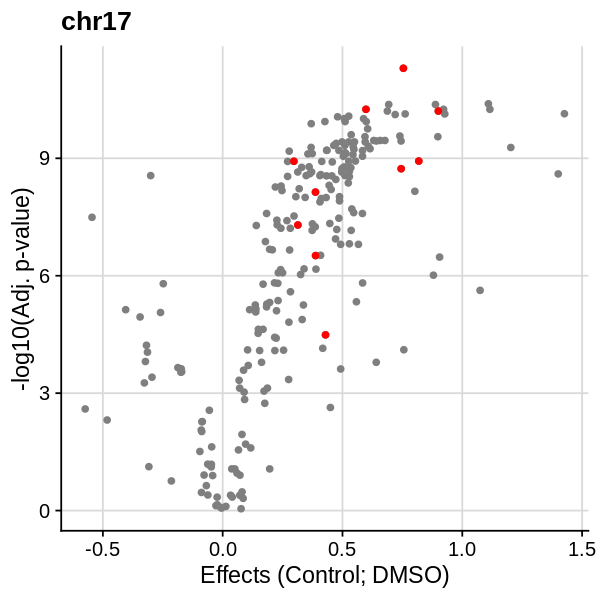

In [67]:
chrom = "chr17"
mtf = c("NR_20", "NFY", "ZBTB14", "ZNF329", "CREB_ATF_2", "HSF", "FOX_7", "RUNX_1", "STAT_1", "AP1_1")
dat = dat_dmso
dat$color = ifelse(dat$Motif %in% mtf, "red", "gray50")
tmp = dat %>% dplyr::filter(color=="red")
gpt = ggplot() + 
        geom_point(aes(x=Estimate, y=NLogP), data = dat, color="gray50") +
        geom_point(aes(x=Estimate, y=NLogP), data = tmp, color="red") + 
        labs(
            x="Effects (Control; DMSO)", 
            y="-log10(Adj. p-value)", 
            title=chrom) +
        theme_cowplot() + 
        background_grid()

print(gpt)

In [ ]:
, "HSFY2"

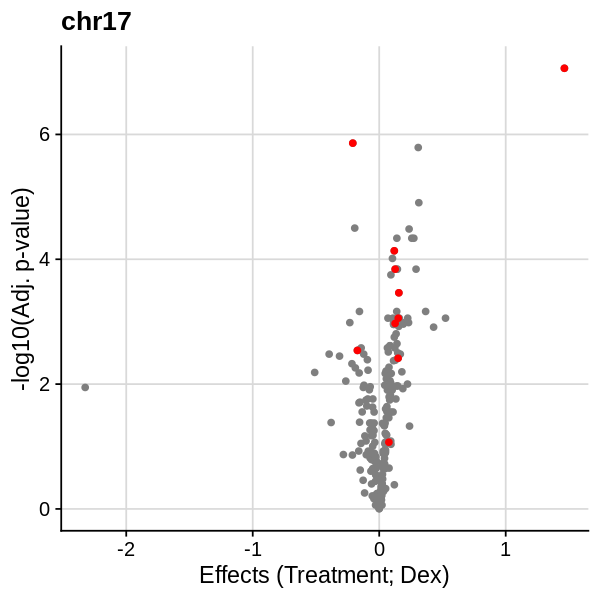

In [68]:
dat = dat_dex
dat$color = ifelse(dat$Motif %in% mtf, "red", "gray50")

tmp = dat %>% dplyr::filter(color=="red")
gpt = ggplot() + 
        geom_point(aes(x=Estimate, y=NLogP), data = dat, color="gray50") +
        geom_point(aes(x=Estimate, y=NLogP), data = tmp, color="red") + 
        labs(
            x="Effects (Treatment; Dex)", 
            y="-log10(Adj. p-value)", 
            title=chrom) +
        theme_cowplot() + 
        background_grid()

print(gpt)

In [41]:
dat %>% dplyr::filter(Motif == "RUNX_1")

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color,Chrom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
RUNX_1,-0.06182779,1.088220e-06,2.194577e-05,4.658649,gray50,chr1
RUNX_1,-0.13494336,3.895135e-06,6.650308e-05,4.177158,gray50,chr4
RUNX_1,-0.10466542,4.602645e-07,2.784601e-05,4.555237,gray50,chr9
RUNX_1,-0.16853178,5.137591e-09,6.216485e-07,6.206455,gray50,chr13
RUNX_1,0.11921451,3.022515e-06,7.314486e-05,4.135816,gray50,chr17
RUNX_1,-0.15670741,8.407136e-08,2.906467e-06,5.536635,gray50,chrX


In [12]:
dat = lst_res_dmso[["chr1"]]
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,-0.3373951,4.818476e-06,7.153811e-06,5.145463,gray50
AP1_1,0.7816025,2.412963e-12,6.488188e-11,10.187877,gray50
AP1_2,0.3651889,3.157164e-11,2.634599e-10,9.579285,gray50
BATF,0.1828164,1.578005e-06,2.580252e-06,5.588338,gray50
BCL6_1,-0.2956843,1.060405e-02,1.188047e-02,1.925167,gray50
BCL6_2,0.1623050,4.035365e-09,1.075997e-08,7.968189,gray50


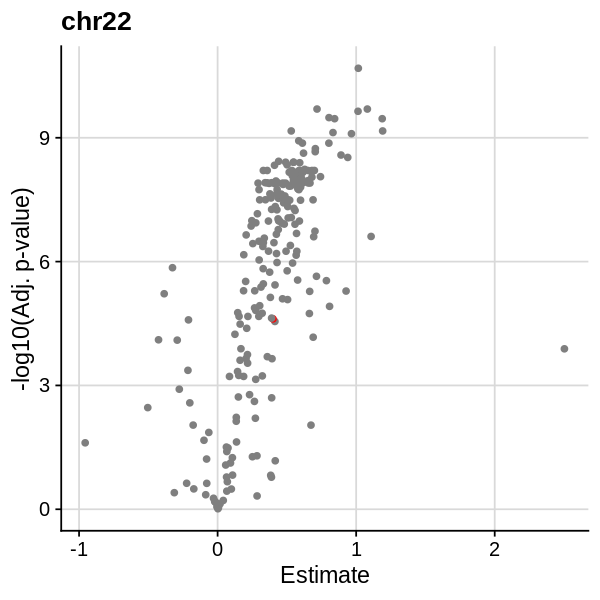

In [17]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = lst_gpt[["chr22"]]
print(gpt)

In [5]:
lst_res = lapply(lst_dat, function(lst_mtf){
    ###
    lst_cof = lapply(names(lst_mtf), function(mtf){
        
        ###
        dat = lst_mtf[[mtf]][["input20x"]]
        fit = dat$fit_log
        res = as.data.frame(summary(fit)$coefficients)
        
        ###
        b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
        b   = c(mtf, b)
        names(b) = c("Motif", "Estimate", "Pvalue")
        return(b)
    })

    ###
    dat = bind_rows(lst_cof)
    dat = dat %>% na.omit
    dat = dat %>% 
        mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
        mutate(NLogP = -log10(AdjPvalue)) 
    dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
    return(dat)
})

In [6]:
dat = lst_res[["chr1"]]
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,-0.059159170,0.1718037157,0.258239125,0.5879780,gray50
AP1_1,0.039936229,0.0827100302,0.136162091,0.8659438,gray50
AP1_2,-0.007215542,0.5777536156,0.641359518,0.1928985,gray50
BATF,-0.100826998,0.0003807960,0.001772166,2.7514956,gray50
BCL6_1,0.159926446,0.1388061896,0.218124012,0.6612965,gray50
BCL6_2,-0.046518613,0.0004657613,0.002087301,2.6804150,gray50


In [7]:
dat = lst_res[["chr22"]]
head(dat)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,0.3576738,1.223693e-02,2.899784e-02,1.537634,gray50
AP1_1,0.1119324,7.666485e-03,2.008286e-02,1.697174,gray50
AP1_2,0.0735301,5.214099e-02,9.377596e-02,1.027908,gray50
BATF,-0.1470166,3.731460e-04,2.498005e-03,2.602407,gray50
BCL6_1,0.2801020,2.623807e-02,5.183095e-02,1.285411,gray50
BCL6_2,0.4616524,1.367524e-06,4.525277e-05,4.344355,gray50


In [8]:
lst_gpt = lapply(names(lst_res), function(chrom){
    dat = lst_res[[chrom]]
    gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
        geom_point(color=dat$color) + 
        labs(x = "Estimate", y="-log10(Adj. p-value)", title=chrom) +
        theme_cowplot() + 
        background_grid()
    return(gpt)
})
names(lst_gpt) = names(lst_res)

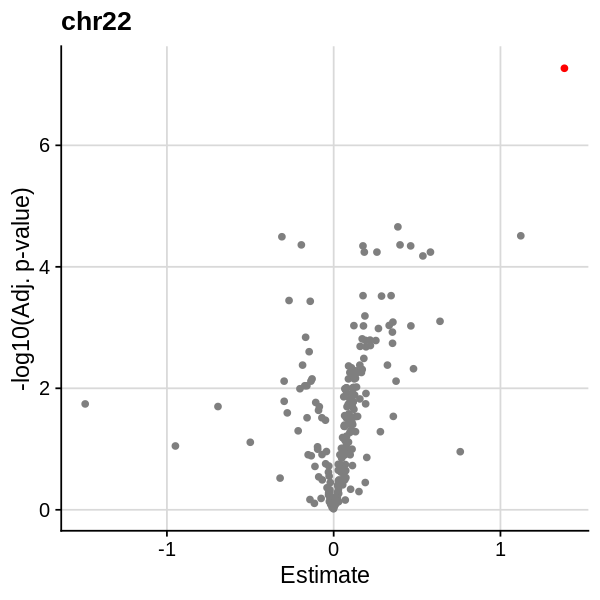

In [9]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = lst_gpt[["chr22"]]
print(gpt)

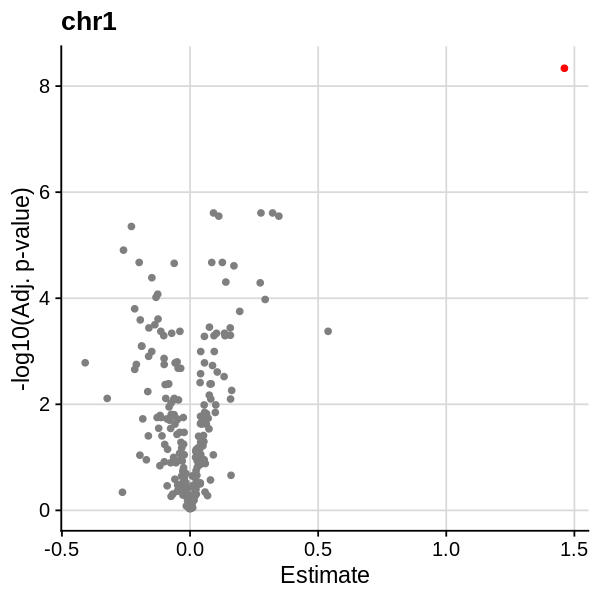

In [10]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = lst_gpt[["chr1"]]
print(gpt)

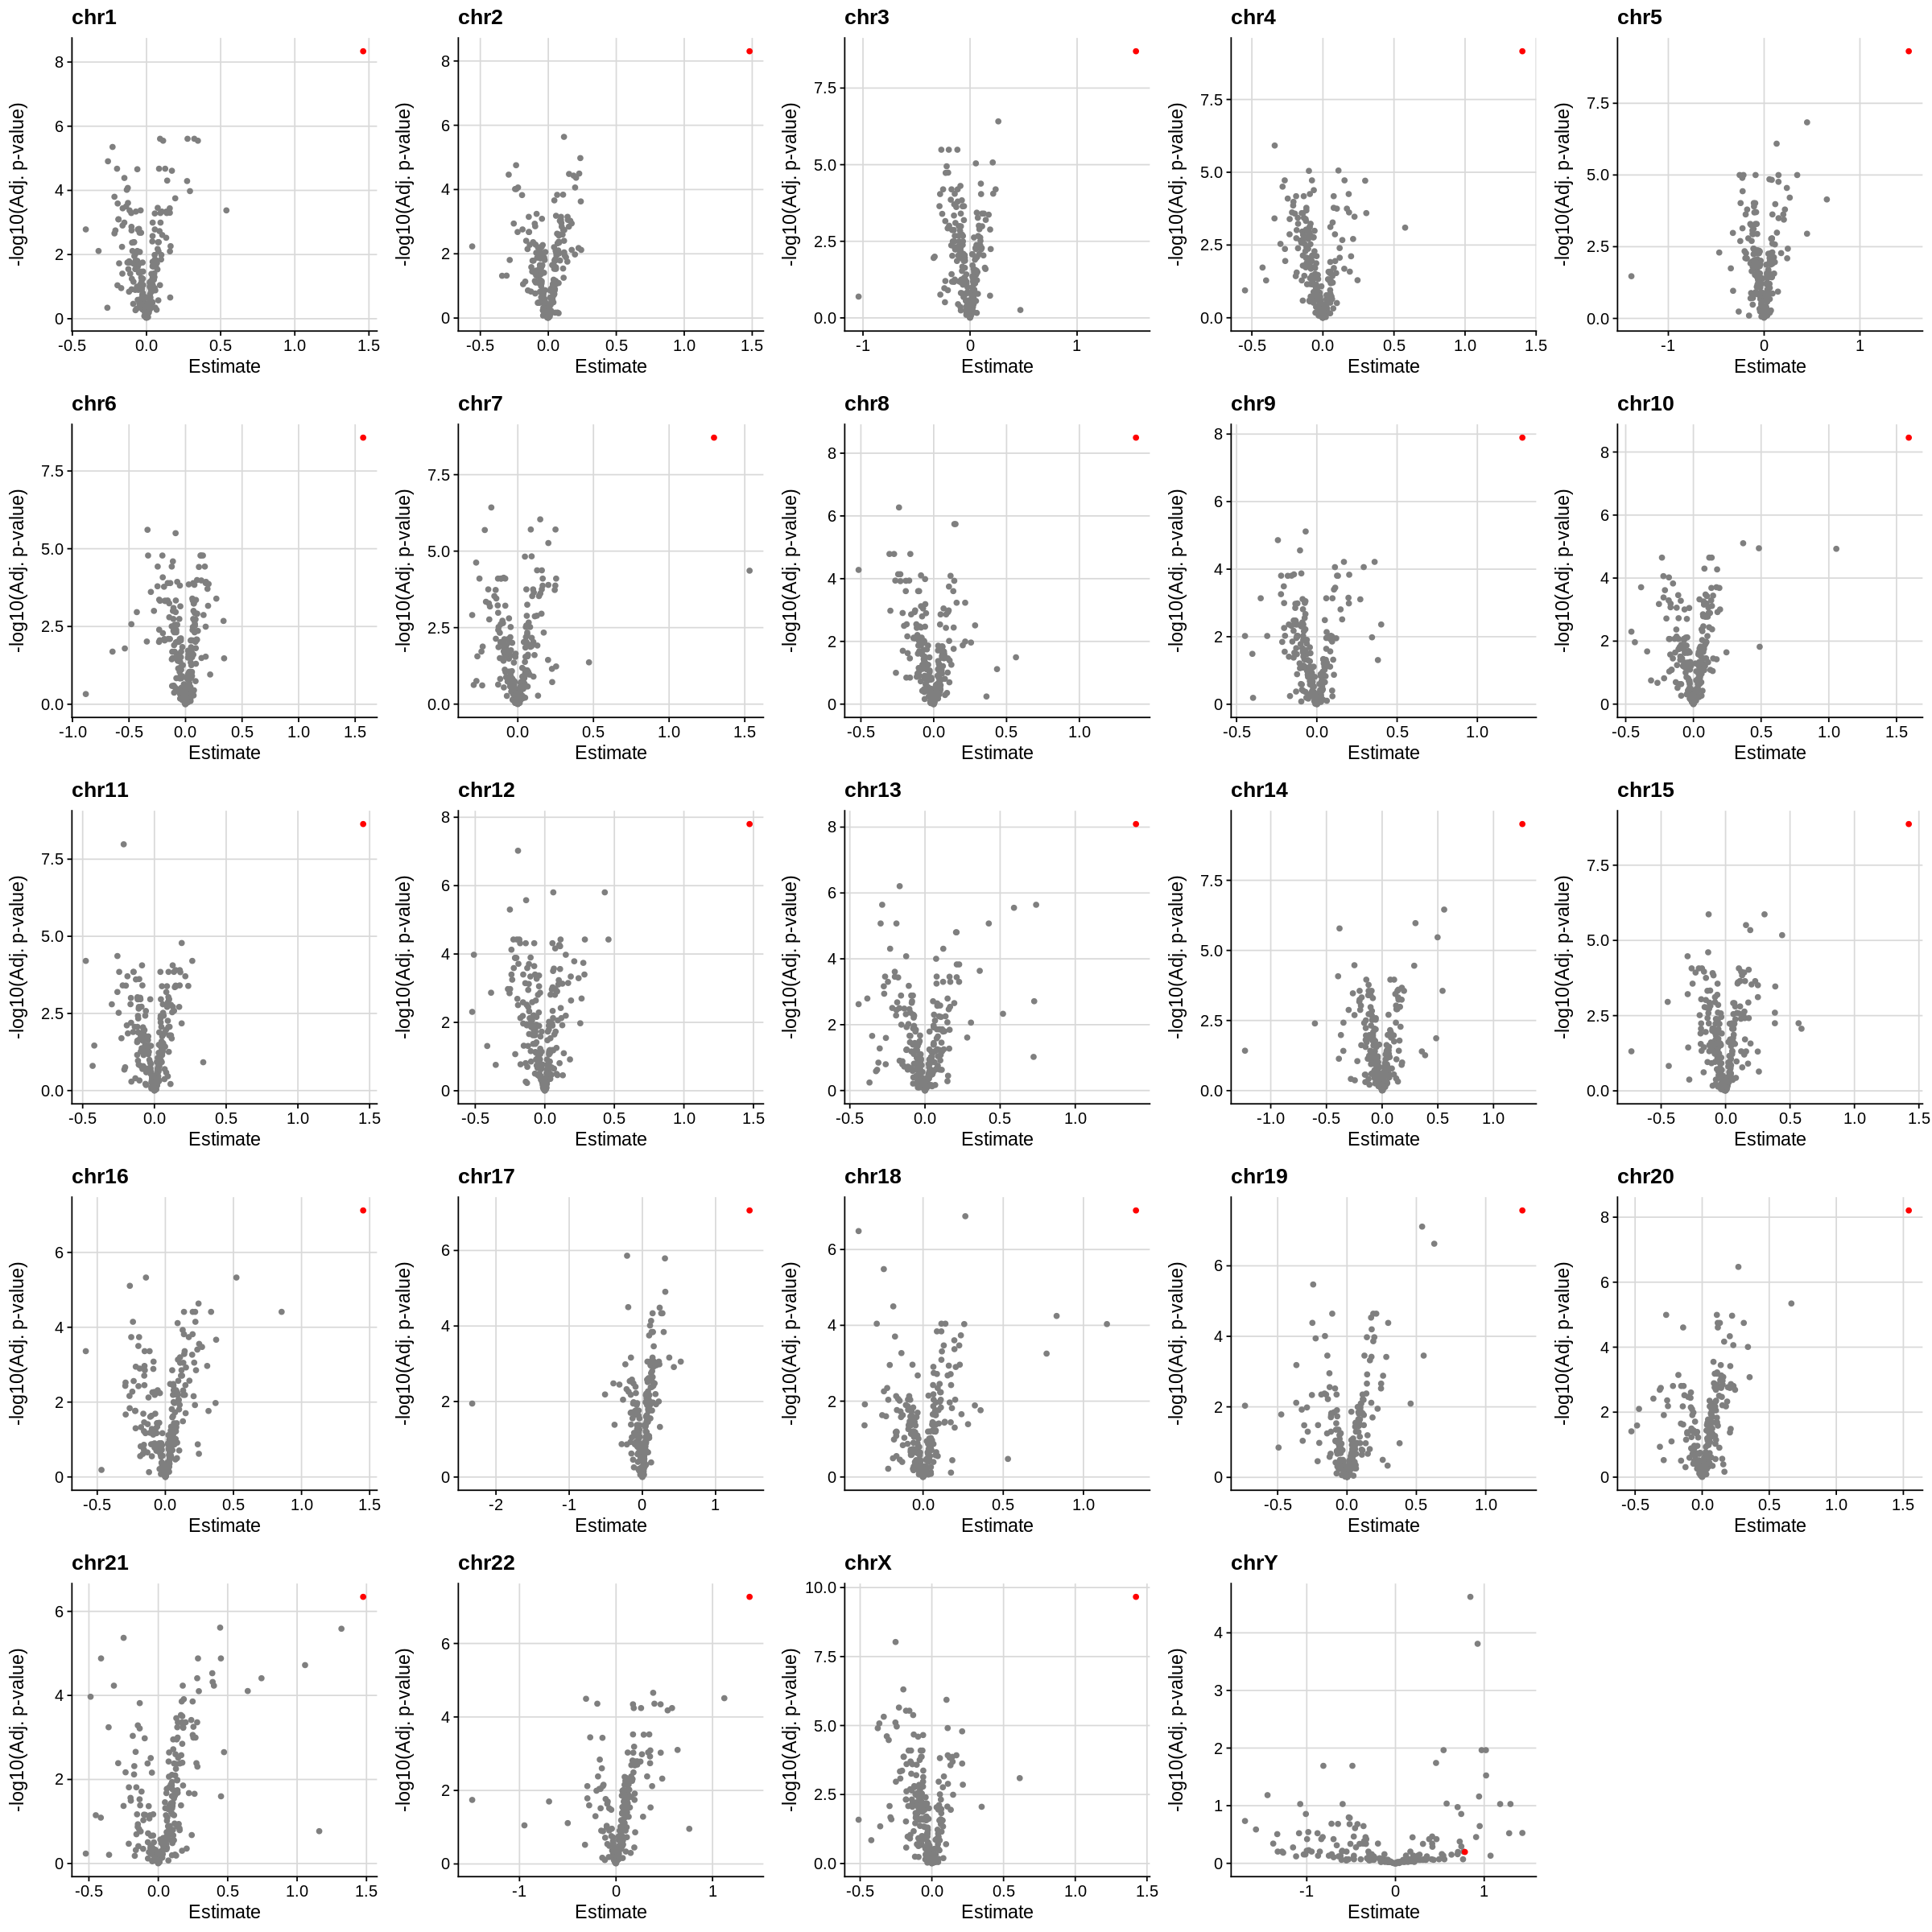

In [44]:
options(repr.plot.height=20, repr.plot.width=20)
plot_grid(plotlist = lst_gpt, align = "v")

In [2]:
TARGET="chr22"
FDIRY = "example"

In [7]:
fdiry = file.path(FD_RES, "model_linear", FDIRY, TARGET)
fname = "lm*"
fglob = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
motifs = sapply(fpaths, function(fpath) {str_remove_all(fpath, pattern = ".*lm_|\\.RDS") })

print(head(motifs))

  /home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_AIRE.RDS 
                                                                       "AIRE" 
 /home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_AP1_1.RDS 
                                                                      "AP1_1" 
 /home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_AP1_2.RDS 
                                                                      "AP1_2" 
  /home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_BATF.RDS 
                                                                       "BATF" 
/home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_BCL6_1.RDS 
                                                                     "BCL6_1" 
/home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_BCL6_2.RDS 
                                                                     "BCL6_2" 


In [5]:
fpath = fpaths[1]
fpath

[1] "/home/mount/work/out/proj_combeffect/model_linear/example/chr22/lm_AIRE.RDS"

In [6]:
str_remove_all(fpath, pattern = ".*lm_|\\.tsv\\.RDS")

[1] "AIRE.RDS"

In [8]:
lst_dat = lapply(fpaths, function(fpath){
    lst = readRDS(fpath)
    return(lst)
})

names(lst_dat) = motifs

In [9]:
lst_dat[1]

$AIRE
$AIRE$input
$AIRE$input$cnt
# A tibble: 13 × 7
   Sample    Value     Size Group    Norm_Value Lognorm_Value X       
   <chr>     <dbl>    <dbl> <chr>         <dbl>         <dbl> <fct>   
 1 Input1      104 18666630 Input    0.00000557         -17.5 Input   
 2 Input2       90 20167924 Input    0.00000446         -17.8 Input   
 3 Input3      135 23280988 Input    0.00000580         -17.4 Input   
 4 Input4      111 19003938 Input    0.00000584         -17.4 Input   
 5 Input5       76 15325016 Input    0.00000496         -17.6 Input   
 6 TFX2_Dex    287 45413539 TFX_Dex  0.00000632         -17.3 TFX_Dex 
 7 TFX2_DMSO   255 43844606 TFX_DMSO 0.00000582         -17.4 TFX_DMSO
 8 TFX3_Dex    224 26400671 TFX_Dex  0.00000848         -16.8 TFX_Dex 
 9 TFX3_DMSO   187 26819569 TFX_DMSO 0.00000697         -17.1 TFX_DMSO
10 TFX4_Dex    330 34590086 TFX_Dex  0.00000954         -16.7 TFX_Dex 
11 TFX4_DMSO   216 30951533 TFX_DMSO 0.00000698         -17.1 TFX_DMSO
12 TFX5_Dex    387 42310

In [10]:
lst_dat[[8]]

$input
$input$cnt
# A tibble: 13 × 7
   Sample    Value     Size Group    Norm_Value Lognorm_Value X       
   <chr>     <dbl>    <dbl> <chr>         <dbl>         <dbl> <fct>   
 1 Input1      481 18666630 Input     0.0000258         -15.2 Input   
 2 Input2      477 20167924 Input     0.0000237         -15.4 Input   
 3 Input3      614 23280988 Input     0.0000264         -15.2 Input   
 4 Input4      524 19003938 Input     0.0000276         -15.1 Input   
 5 Input5      391 15325016 Input     0.0000255         -15.3 Input   
 6 TFX2_Dex   2454 45413539 TFX_Dex   0.0000540         -14.2 TFX_Dex 
 7 TFX2_DMSO  2698 43844606 TFX_DMSO  0.0000615         -14.0 TFX_DMSO
 8 TFX3_Dex   1434 26400671 TFX_Dex   0.0000543         -14.2 TFX_Dex 
 9 TFX3_DMSO  1593 26819569 TFX_DMSO  0.0000594         -14.0 TFX_DMSO
10 TFX4_Dex   1895 34590086 TFX_Dex   0.0000548         -14.2 TFX_Dex 
11 TFX4_DMSO  1775 30951533 TFX_DMSO  0.0000573         -14.1 TFX_DMSO
12 TFX5_Dex   2229 42310249 TFX_Dex   0.

In [13]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]][["input20x"]]
    fit = dat$fit
    res = as.data.frame(summary(fit)$coefficients)
    
    b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,1.897739e-06,1.060367e-02,2.481054e-02,1.605364,gray50
AP1_1,8.670149e-05,7.596805e-03,1.968635e-02,1.705835,gray50
AP1_2,7.926819e-05,4.956566e-02,8.848389e-02,1.053136,gray50
BATF,-7.903859e-06,3.101896e-04,2.198697e-03,2.657835,gray50
BCL6_1,2.333032e-06,2.311644e-02,4.642552e-02,1.333243,gray50
BCL6_2,1.269952e-04,1.503794e-06,4.530179e-05,4.343885,gray50
CCAAT_CEBP,6.131254e-06,5.562901e-03,1.534860e-02,1.813931,gray50
CENBP,-5.532242e-06,2.561070e-05,3.630694e-04,3.440010,gray50
CREB3_XBP1,5.514052e-05,9.062570e-04,4.646977e-03,2.332829,gray50


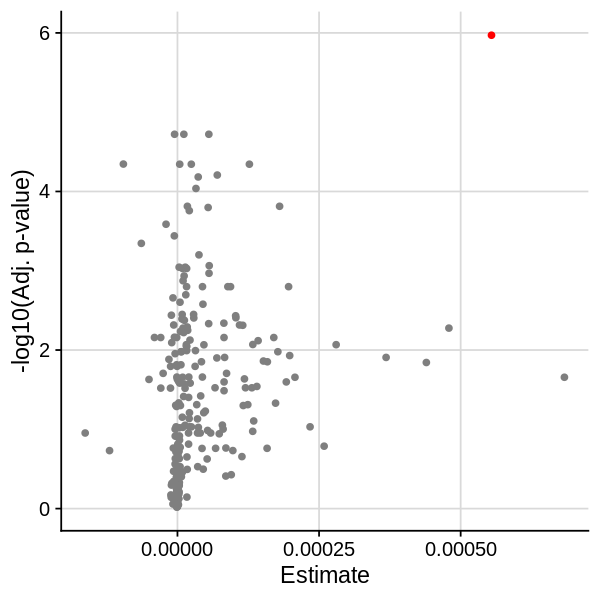

In [14]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [15]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]][["input20x"]]
    fit = dat$fit_log
    res = as.data.frame(summary(fit)$coefficients)
    
    b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,0.3576738,1.223693e-02,2.899784e-02,1.537634,gray50
AP1_1,0.1119324,7.666485e-03,2.008286e-02,1.697174,gray50
AP1_2,0.0735301,5.214099e-02,9.377596e-02,1.027908,gray50
BATF,-0.1470166,3.731460e-04,2.498005e-03,2.602407,gray50
BCL6_1,0.2801020,2.623807e-02,5.183095e-02,1.285411,gray50
BCL6_2,0.4616524,1.367524e-06,4.525277e-05,4.344355,gray50
CCAAT_CEBP,0.1916836,6.384846e-03,1.802807e-02,1.744051,gray50
CENBP,-0.1405259,2.605655e-05,3.693900e-04,3.432515,gray50
CREB3_XBP1,0.1263316,1.184554e-03,5.826069e-03,2.234624,gray50


In [ ]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [86]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]]
    fit = dat$fit
    res = as.data.frame(summary(fit)$coefficients)
    
    b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,1.897739e-06,1.060367e-02,2.481054e-02,1.605364,gray50
AP1_1,8.670149e-05,7.596805e-03,1.968635e-02,1.705835,gray50
AP1_2,7.926819e-05,4.956566e-02,8.848389e-02,1.053136,gray50
BATF,-7.903859e-06,3.101896e-04,2.198697e-03,2.657835,gray50
BCL6_1,2.333032e-06,2.311644e-02,4.642552e-02,1.333243,gray50
BCL6_2,1.269952e-04,1.503794e-06,4.530179e-05,4.343885,gray50
CCAAT_CEBP,6.131254e-06,5.562901e-03,1.534860e-02,1.813931,gray50
CENBP,-5.532242e-06,2.561070e-05,3.630694e-04,3.440010,gray50
CREB3_XBP1,5.514052e-05,9.062570e-04,4.646977e-03,2.332829,gray50


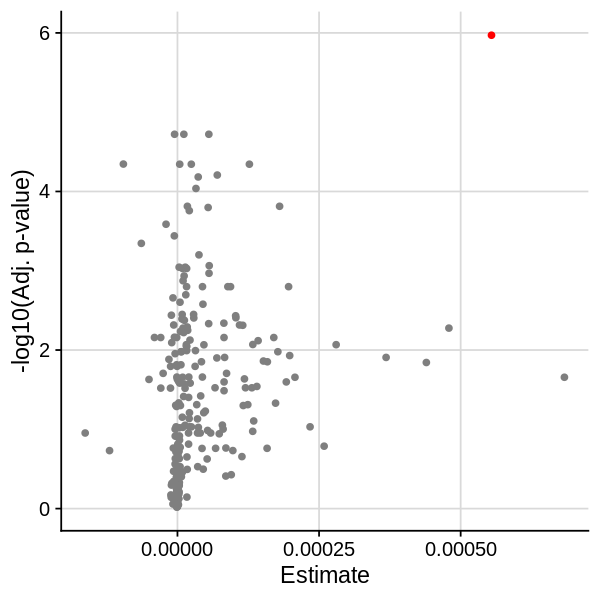

In [87]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [90]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]]
    fit = dat$fit_log
    res = as.data.frame(summary(fit)$coefficients)
    
    b   = res['XXTFX_Dex', c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE,0.3576738,1.223693e-02,2.899784e-02,1.537634,gray50
AP1_1,0.1119324,7.666485e-03,2.008286e-02,1.697174,gray50
AP1_2,0.0735301,5.214099e-02,9.377596e-02,1.027908,gray50
BATF,-0.1470166,3.731460e-04,2.498005e-03,2.602407,gray50
BCL6_1,0.2801020,2.623807e-02,5.183095e-02,1.285411,gray50
BCL6_2,0.4616524,1.367524e-06,4.525277e-05,4.344355,gray50
CCAAT_CEBP,0.1916836,6.384846e-03,1.802807e-02,1.744051,gray50
CENBP,-0.1405259,2.605655e-05,3.693900e-04,3.432515,gray50
CREB3_XBP1,0.1263316,1.184554e-03,5.826069e-03,2.234624,gray50


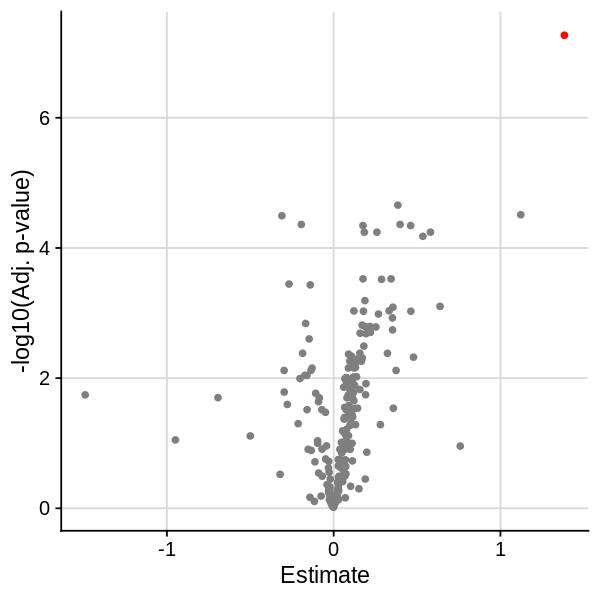

In [91]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [92]:
dat %>% dplyr::filter(NLogP > 4)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BCL6_2,0.4616524,1.367524e-06,4.525277e-05,4.344355,gray50
E2F_3,-0.3105484,5.311001e-07,3.199878e-05,4.494867,gray50
HD_10,0.5802404,2.612695e-06,5.724178e-05,4.242287,gray50
MAF,0.5349920,3.297477e-06,6.622434e-05,4.178982,gray50
MYB_1,1.1219627,3.841080e-07,3.085667e-05,4.510651,gray50
NFAT_2,0.3849826,1.825711e-07,2.199982e-05,4.657581,gray50
NFY,-0.1938747,9.571775e-07,4.354795e-05,4.361032,gray50
NR_14,0.3979353,1.084181e-06,4.354795e-05,4.361032,gray50
NR_20,1.3835716,2.236167e-10,5.389162e-08,7.268479,red


In [93]:
dat %>% dplyr::filter(Estimate < -1)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HD_3,-1.490042,0.006529622,0.0180878,1.742614,gray50


In [71]:
dat %>% dplyr::filter(Estimate < -2)

Motif,Estimate,Pvalue,NlogP,color
<chr>,<dbl>,<dbl>,<dbl>,<chr>
HSFY2,-2.32454,0.003974528,2.400714,gray50


In [72]:
lst_dat[["HSFY2"]]

$cnt
# A tibble: 12 × 7
   Sample     Value      Size Group      Norm_Value Lognorm_Value X       
   <chr>      <dbl>     <dbl> <chr>           <dbl>         <dbl> <fct>   
 1 Input1_20x    93 371718546 Input    0.000000250          -21.9 Input   
 2 Input2_20x   103 347635732 Input    0.000000296          -21.7 Input   
 3 Input3_20x   103 349994051 Input    0.000000294          -21.7 Input   
 4 Input4_20x   152 413508358 Input    0.000000368          -21.4 Input   
 5 Input5_20x   113 341110487 Input    0.000000331          -21.5 Input   
 6 TFX2_Dex       1  45413539 TFX_Dex  0.0000000220         -25.4 TFX_Dex 
 7 TFX2_DMSO      9  43844606 TFX_DMSO 0.000000205          -22.2 TFX_DMSO
 8 TFX3_Dex       2  26400671 TFX_Dex  0.0000000758         -23.7 TFX_Dex 
 9 TFX3_DMSO      6  26819569 TFX_DMSO 0.000000224          -22.1 TFX_DMSO
10 TFX4_Dex       3  34590086 TFX_Dex  0.0000000867         -23.5 TFX_Dex 
11 TFX5_Dex       5  42310249 TFX_Dex  0.000000118          -23.0 TFX_Dex 
1